In [184]:
import pandas as pd
import numpy as np
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [229]:
setup_path = "C:/Users/jacob.t.mangini/Documents/Jupyter/Data Analysis/" #@param {type:"string"}
setup_sheet = "Build05_Day1_huedifferencecombined_headers_abs.xlsx" #@param {type:"string"}

In [203]:
# Run this if you need to clear things out - if you change the spreadsheet and it's not
# showing up in your results - try this before you reboot the entire kernel.
del df
del labellist
del pruned

In [232]:
df = pd.read_excel(setup_path + setup_sheet, header=None)

# This will grab the top row and turn it into a list called "labellist"

newlabels=(df.iloc[:1,].values)
labellist=newlabels[0].tolist()

# delete that dataframe...
del df

# Now we're opening the same spreadsheet up again but this time
# it will have that label list attached to it, which will make life
# easier later on.

df = pd.read_excel(setup_path + setup_sheet, names=labellist, index_col=0)

# We're going to turn that label list into a dictionary, which will 
# get rid of duplicate entries - our next move will be to step through
# that pruned list ('pruned') and grab all matching columns to derive
# our means from.

pruned = list(dict.fromkeys(labellist))
pruned.pop(0) # get 'mins' out of there.

paramVals = []
paramVals.append(df.index.values)

#Calculates and appends the mean of each ticket index in pruned to paramVals
for p in pruned:
    paramVals.append(df.filter(items=[p],axis=1).mean(axis=1).values)

#Prints out the pruned list
print(pruned)

['M1', 'O1', 'M2', 'O2', 'M3', 'O3', 'M4', 'O4', 'M5', 'O5', 'M6', 'O6']


In [258]:
# define our function - this is the 6-component fit that should give us info we want.
def func(x, initialsignal, initialslope, finalsignal, finalslope, transitionslope, transitionmidpoint):
  observedsignal = ((initialsignal+(initialslope*x))+(finalsignal+(finalslope*x))*np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))/(1+np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))
  return observedsignal

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

t_half_max = []

#Computes the t half max for all indexes in pruned and assigns them to the t_half_max list
n = 1         #Keeps track of which ticket index is being calculated
for p in pruned:
    popt, pcov = curve_fit(sigmoid, paramVals[0], paramVals[n],[max(paramVals[n]), np.median(paramVals[0]),1,min(paramVals[n])], method='dogbox')
    t_half_max.append(popt[0])
    n += 1

In [243]:
#Determines the best t half max out of all the ticket indexes
def find_best_t_half_max(t_half_max):
    best_t_half_max = t_half_max[0]
    for i in range(len(t_half_max) - 1):
        x = i + 1
        if(t_half_max[x] < best_t_half_max):
            best_t_half_max = t_half_max[x]
    return best_t_half_max

best_t_half_max = find_best_t_half_max(t_half_max)
            
ranges = []
        
#Calculates the range for all the ticket indexes
n = 1
for p in pruned:
    ranges.append(paramVals[n].max() - paramVals[n].min())
    n += 1
    
#Determines the best range out of all the ticket indexes
def find_best_range(ranges):
    best_range = 0
    for i in range(len(ranges) - 1):
        x = i + 1
        if (ranges[x] > best_range):
            best_range = ranges[x]
    return best_range
    
best_range = find_best_range(ranges)

#Adds the corresponding name to each t half max value
t_half_max_named = []
for t in t_half_max:
    t_half_max_named.append([t, pruned[t_half_max.index(t)]])
    
#Adds the corresponding name to each range value
ranges_named = []
for r in ranges:
    ranges_named.append([r, pruned[ranges.index(r)]])
    
#Prints all items in the list
print('t Half Maxes:')
for i in t_half_max_named:
    print(i)
    
print()
    
#Prints all items in the list
print('Ranges:')
for i in ranges_named:
    print(i)
    
print()
    
#Sorts the data in the lists from least to greatest
t_half_max_named.sort()
ranges_named.sort()

#Prints each index of the list
print("t Half Maxes ordered from least to greatest:")
for i in t_half_max_named:
    print(i)
    
print()
print()

#Prints each index of the list
print("Ranges ordered from least to greatest:")
for i in ranges_named:
    print(i)
    
#Creates a 2D array that has all manual indexes in index 0 and all Opentrons indexes in index 1
manual_half_max = []
opentrons_half_max = []
count = 1
for i in t_half_max:
    if(count % 2 != 0):
        manual_half_max.append(i)
    else:
        opentrons_half_max.append(i)
    count += 1

#Combines the manual and opentrons half max lists into one list
boxplot_data = [manual_half_max, opentrons_half_max]

t Half Maxes:
[37.885882670923095, 'M1']
[38.62910598779461, 'O1']
[34.13746429585877, 'M2']
[33.446558133000195, 'O2']
[39.50638319505183, 'M3']
[36.94258174122113, 'O3']
[38.90415474327609, 'M4']
[39.50484192912431, 'O4']
[30.18291605702428, 'M5']
[36.9090187020279, 'O5']
[37.29791462639037, 'M6']
[38.00811760904241, 'O6']

Ranges:
[35.7071256749498, 'M1']
[37.787724561867, 'O1']
[31.5098056039272, 'M2']
[29.6584776352261, 'O2']
[38.408900089531, 'M3']
[36.7020504354304, 'O3']
[38.2907466776514, 'M4']
[38.4999181486541, 'O4']
[27.7128236570893, 'M5']
[36.0534547297824, 'O5']
[36.7847158195663, 'M6']
[37.5139371711601, 'O6']

t Half Maxes ordered from least to greatest:
[30.18291605702428, 'M5']
[33.446558133000195, 'O2']
[34.13746429585877, 'M2']
[36.9090187020279, 'O5']
[36.94258174122113, 'O3']
[37.29791462639037, 'M6']
[37.885882670923095, 'M1']
[38.00811760904241, 'O6']
[38.62910598779461, 'O1']
[38.90415474327609, 'M4']
[39.50484192912431, 'O4']
[39.50638319505183, 'M3']


Range

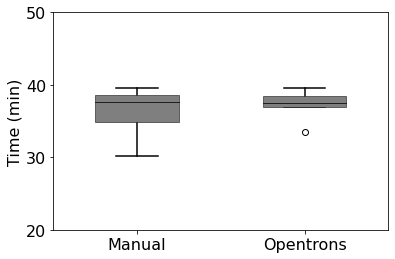

In [256]:
#Set up the plot
fig, ax = plt.subplots()

#Sets the axis labels
plt.ylabel('Time (min)', fontsize=16)

#Plot the boxplot
VP = ax.boxplot(boxplot_data, positions=[1,2], widths=0.5, patch_artist=True,
                showmeans=False, showfliers=True,
                medianprops={"color": "black", "linewidth": 0.75},
                boxprops={"facecolor": "C7", "edgecolor": "black",
                          "linewidth": 0.5},
                whiskerprops={"color": "black", "linewidth": 1.5},
                capprops={"color": "black", "linewidth": 1.5})

#Set axis limits
ax.set(ylim=(20,50), yticks=np.arange(20, 51, 10))

#Sets the name and font size of the x/y ticks on the boxplot
plt.xticks([1,2],['Manual','Opentrons'], fontsize=16)
plt.yticks(fontsize=16)

#Displays the boxplot
plt.show()